# MACHINE LEARNING

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [20]:
temp = pd.read_csv('../data/raw/city_temperature.csv')
temp

c:\Users\vsuar\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8


In [21]:
temp[temp['Country'] == 'Italy']['City'].unique()

array(['Milan', 'Rome'], dtype=object)

In [22]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB


In [23]:
temp.describe()

,Month,Day,Year,AvgTemperature
count,2.906327e+06,2.906327e+06,2.906327e+06,2.906327e+06
mean,6.469163e+00,1.571682e+01,2.006624e+03,5.600492e+01
std,3.456489e+00,8.800534e+00,2.338226e+01,3.212359e+01
min,1.000000e+00,0.000000e+00,2.000000e+02,-9.900000e+01
25%,3.000000e+00,8.000000e+00,2.001000e+03,4.580000e+01
50%,6.000000e+00,1.600000e+01,2.007000e+03,6.250000e+01
75%,9.000000e+00,2.300000e+01,2.013000e+03,7.550000e+01
max,1.200000e+01,3.100000e+01,2.020000e+03,1.100000e+02


In [24]:
temp = temp.drop_duplicates()

In [25]:
temp.isna().sum()

Region                  0
Country                 0
State             1448805
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64

In [26]:
temp = temp.fillna('Not available')

In [27]:
temp

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Not available,Algiers,1,1,1995,64.2
1,Africa,Algeria,Not available,Algiers,1,2,1995,49.4
2,Africa,Algeria,Not available,Algiers,1,3,1995,48.8
3,Africa,Algeria,Not available,Algiers,1,4,1995,46.4
4,Africa,Algeria,Not available,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8


In [28]:
temp.isna().sum()

Region            0
Country           0
State             0
City              0
Month             0
Day               0
Year              0
AvgTemperature    0
dtype: int64

In [29]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2885612 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 198.1+ MB


In [30]:
temp.columns

Index(['Region', 'Country', 'State', 'City', 'Month', 'Day', 'Year',
       'AvgTemperature'],
      dtype='object')

In [31]:
temp = temp[~((temp['Year'] == 200) | (temp['Year'] == 201) | (temp['Day'] == 0))]

In [33]:
temp["AvgTemperature"] = temp["AvgTemperature"].apply(lambda fahrenheit: (fahrenheit - 32) * (5/9))
temp

c:\Users\vsuar\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Not available,Algiers,1,1,1995,-7.839506
1,Africa,Algeria,Not available,Algiers,1,2,1995,-12.407407
2,Africa,Algeria,Not available,Algiers,1,3,1995,-12.592593
3,Africa,Algeria,Not available,Algiers,1,4,1995,-13.333333
4,Africa,Algeria,Not available,Algiers,1,5,1995,-12.870370
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,-2.222222
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,-2.469136
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,-1.666667
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,-1.790123


In [34]:
temp['Date'] = pd.to_datetime(temp[['Year','Month','Day']])
temp

c:\Users\vsuar\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Region,Country,State,City,Month,Day,Year,AvgTemperature,Date
0,Africa,Algeria,Not available,Algiers,1,1,1995,-7.839506,1995-01-01
1,Africa,Algeria,Not available,Algiers,1,2,1995,-12.407407,1995-01-02
2,Africa,Algeria,Not available,Algiers,1,3,1995,-12.592593,1995-01-03
3,Africa,Algeria,Not available,Algiers,1,4,1995,-13.333333,1995-01-04
4,Africa,Algeria,Not available,Algiers,1,5,1995,-12.870370,1995-01-05
...,...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,-2.222222,2013-07-27
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,-2.469136,2013-07-28
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,-1.666667,2013-07-29
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,-1.790123,2013-07-30


In [35]:
temp =temp[(temp['AvgTemperature'] >= -50) & (temp['Year'] < 2020)]
temp

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Date
0,Africa,Algeria,Not available,Algiers,1,1,1995,-7.839506,1995-01-01
1,Africa,Algeria,Not available,Algiers,1,2,1995,-12.407407,1995-01-02
2,Africa,Algeria,Not available,Algiers,1,3,1995,-12.592593,1995-01-03
3,Africa,Algeria,Not available,Algiers,1,4,1995,-13.333333,1995-01-04
4,Africa,Algeria,Not available,Algiers,1,5,1995,-12.870370,1995-01-05
...,...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,-2.222222,2013-07-27
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,-2.469136,2013-07-28
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,-1.666667,2013-07-29
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,-1.790123,2013-07-30


<Figure size 4000x2000 with 0 Axes>

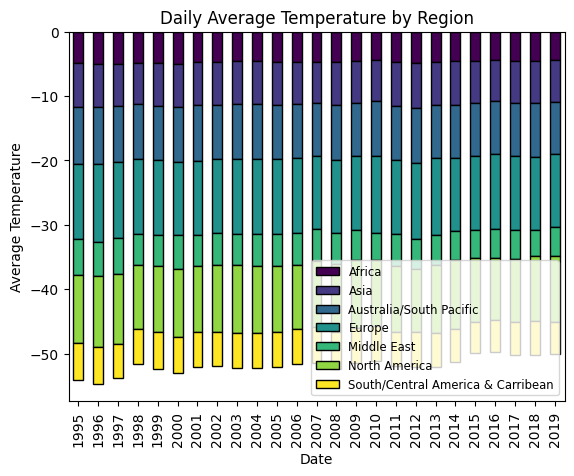

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tienes el DataFrame 'df' con las columnas 'Region', 'Year' y 'AvgTemperature'

# Agrupar los datos por Región y Año para calcular la media de temperaturas por región y año
region = temp.groupby(['Region', 'Year'])['AvgTemperature'].mean().reset_index()

# Crear un DataFrame con las medias de temperaturas por año para cada región
pivot_region = region.pivot(index='Year', columns='Region', values='AvgTemperature')

# Configurar el tamaño del gráfico
plt.figure(figsize=(40, 20))

# Crear el gráfico de barras apiladas
pivot_region.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='black')

# Configurar el título y etiquetas de los ejes
plt.title("Daily Average Temperature by Region")
plt.xlabel("Date")
plt.ylabel("Average Temperature")
plt.legend(fontsize='small')
# Mostrar el gráfico
plt.show()


In [37]:
temp.drop(['Region', 'State', 'Country', 'Day', 'Date'], axis=1, inplace=True)
temp

c:\Users\vsuar\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,City,Month,Year,AvgTemperature
0,Algiers,1,1995,-7.839506
1,Algiers,1,1995,-12.407407
2,Algiers,1,1995,-12.592593
3,Algiers,1,1995,-13.333333
4,Algiers,1,1995,-12.870370
...,...,...,...,...
2906322,San Juan Puerto Rico,7,2013,-2.222222
2906323,San Juan Puerto Rico,7,2013,-2.469136
2906324,San Juan Puerto Rico,7,2013,-1.666667
2906325,San Juan Puerto Rico,7,2013,-1.790123


In [38]:
le = LabelEncoder()
temp["City"] = le.fit_transform(temp["City"])
temp

c:\Users\vsuar\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,City,Month,Year,AvgTemperature
0,7,1,1995,-7.839506
1,7,1,1995,-12.407407
2,7,1,1995,-12.592593
3,7,1,1995,-13.333333
4,7,1,1995,-12.870370
...,...,...,...,...
2906322,261,7,2013,-2.222222
2906323,261,7,2013,-2.469136
2906324,261,7,2013,-1.666667
2906325,261,7,2013,-1.790123


In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
import pickle
import yaml

In [57]:
train, test = train_test_split(temp)

In [58]:
train.to_csv('../data/train.csv')

In [59]:
test.to_csv('../data/test.csv')

In [60]:
X = train.drop(["AvgTemperature"], axis=1)
y = train["AvgTemperature"]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21)

DECISION TREE REGRESSOR

In [62]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
r2_score(y_test, y_pred)

0.8822803126271973

In [46]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 1.4555002130914687


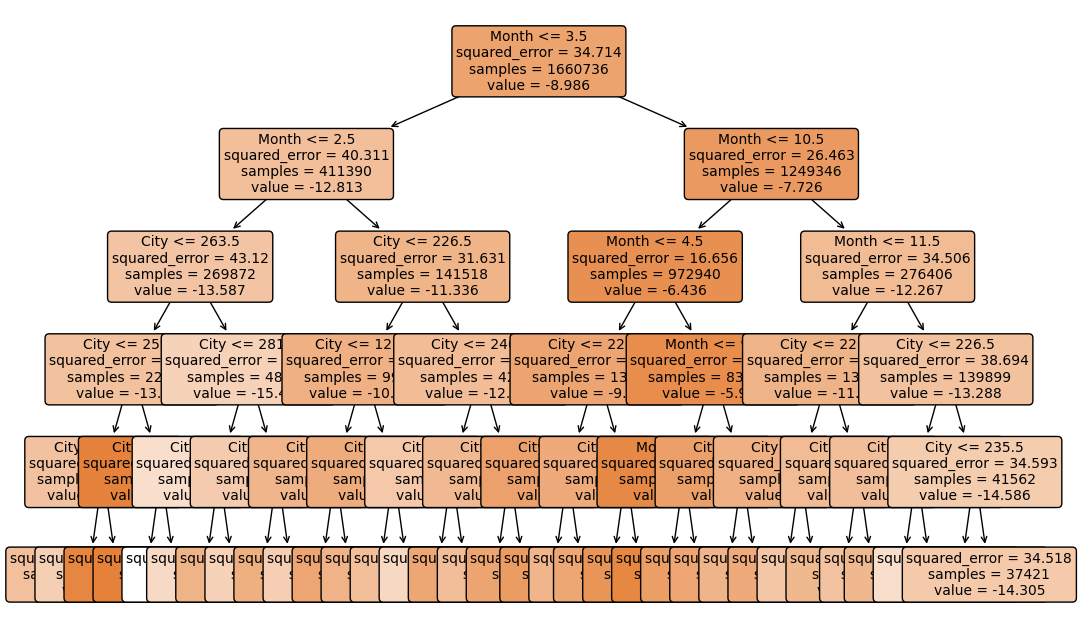

In [47]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Crear y entrenar el modelo de regresión de árbol de decisión
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_train, y_train)

# Visualizar el árbol de decisión utilizando plot_tree
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=X_train.columns, filled=True, rounded=True, fontsize=10)
plt.show()

In [63]:
with open('../models/modelo_tree.pkl', 'wb') as modtree:
    pickle.dump(tree, modtree)

In [64]:
with open("../models/model_tree.yaml", "w") as a:
    yaml.dump(tree, a)

RANDOM FOREST REGRESSOR

In [ ]:
# rf = RandomForestRegressor()
# rf.fit(X_train, y_train)
# r2_score(y_test, rf.predict(X_test))

In [65]:
with open('../models/modelo_tree.pkl', 'rb') as archivo_entrada:
    modelo_entrenado = pickle.load(archivo_entrada)

**EVALUACIÓN**

In [66]:
temp_test = pd.read_csv('../data/test.csv', index_col=0)
temp_test

,City,Month,Year,AvgTemperature
2348745,238,5,1999,-6.759259
637981,302,8,2009,-6.296296
482442,182,7,2006,-1.481481
1653999,136,5,1996,-9.722222
2905228,261,7,2010,-1.882716
...,...,...,...,...
519999,284,11,2007,-6.172840
1164330,218,11,2013,-17.623457
1503955,110,3,2013,-26.049383
1848288,223,10,2014,-14.598765


In [67]:
X_val = temp_test.drop(columns=['AvgTemperature'])
X_val

,City,Month,Year
2348745,238,5,1999
637981,302,8,2009
482442,182,7,2006
1653999,136,5,1996
2905228,261,7,2010
...,...,...,...
519999,284,11,2007
1164330,218,11,2013
1503955,110,3,2013
1848288,223,10,2014


In [68]:
y_val = temp_test['AvgTemperature']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_val, y_val, test_size=0.20, random_state=21)

In [70]:
predicciones = modelo_entrenado.predict(X_test)
modelo_entrenado.score(X_test, y_test)

0.882755291637566